Time series generated by biological systems most likely contain deterministic and stochastic components.
So both approaches to time series analysis may provide complementary information about the underlying dynamics.

**Aim:** to introduce a method that compare the degree of complexity of different time series.

Such complexity-related metrics have potentially important applications to discriminate time series generated either by
 different systems or by the same system under different conditions.

Traditional methods to quantify degree of regularity of a time series evaluate the appearance of repetitive patterns.

However, no straightforward correspondence between **regularity** (measured by entropy-based algo) and **complexity**.
Complexity is associated with "meaningful structural richness" which may exhibit relatively higher regularity in
contrast to outputs of random phenomena.

Entropy-based measures grow monotonically with degree of randomness. Therefore, they assign highest values to
uncorrelated random signals (white noise) which are **highly unpredictable** but **not structurally "complex".**

Thus, when applied to physiologic time series, traditional entropy-based algo may lead to misleading results. They
assign higher entropy values to certain pathologic cardiac rhythms that generate erratic outputs than to healthy cardiac
 rhythms that are exquisitely regulated by multiple interacting control mechanisms which should be more complex.

Thus, there needs to define a quantitative measurement of complexity that **assigns minimum values** to **both
deterministic/predictable and uncorrelated random/unpredictable signals.**

#### Motivation

Three basic hypotheses:

1. The complexity of a biological system reflects its ability to adapt and function in ever-changing environment

2. Biological systems need to operate across multiple spatial and temporal scales, hence their complexity is also multiscaled

3. A wide class of disease states reduce adaptive capacity of the individual -> loss of complexity

Thus, the approach to define a complexity measure focuses on **quantify information expressed by physiologic dynamics over multiple scales**

## Formula
Given a 1-D discrete time series, construct consecutive coarse-grained time series $\{y^{(\tau)}\}$ corresponding to the
scale factor $\tau$.

1. Divide original time series into non-overlapping windows of length $\tau$.
2. Average data points inside each window.

Each element of a coarse-grained time series is calculated according to the equation:
$$y^{\tau}_j = \frac{1}{\tau} \sum^{j\tau}_{i=(j-1)\tau+1} x_i, 1 \leq j \leq N/\tau$$

For scale one, time series $\{y_(1)\}$ is simply the original series. Length of each coarse-grained time series is equal
to length of original series divides by scale factor $\tau$. This is also the **only scale** considered by traditional
single-scale based "complexity" method such as SampEn.


Finally, we calculate SampEn for each coarse-grained time series plotted as a function of the scale factor $\tau$.

The MSE curves are used to compare the relative complexity of normalized time series (same variance for scale one) based on these guidelines:

1. If for the majority of the scales the entropy values are higher for one time series than for another, the former is considered more complex

2. A monotonic decrease of the entropy values indicates the original signal contains information only in the smallest scale.

Zhang defined complexity as an integral of all the scale-dependent entropies which for a discrete signal could be estimated by $K = \sum^N_{i=1}H(i)(N \longrightarrow \infty)$. Due to finite length of real-world time series, entropy can only be calculated for a finite range of scales. Thus, sum to infinity not feasible and we focus on analysis of MSE curves instead of assigning a single complexity value to each time series.

Also, for biological systems, the MSE curve may provide useful insights into control mechanisms underlying physiologic dynamics over different scales.

![](https://i.imgur.com/Lv3NWt3.png)
Figure showing MSE curves across different scales

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd

signal = nk.signal_simulate(duration=2, frequency=5)

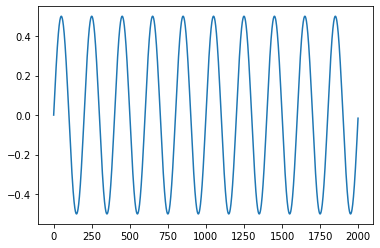

In [2]:
import matplotlib.pyplot as plt
plt.plot(signal)

0.22802651903377408

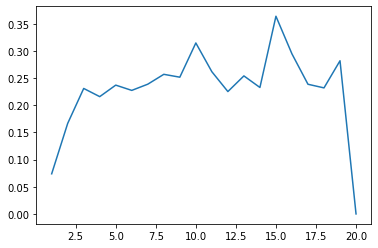

In [3]:
entropy1 = nk.entropy_multiscale(signal, show=True)
entropy1

Below we define `_get_r()` and `_get_scale()` as functions to get appropriate r and scale values.

In [4]:
def _get_r(signal, r="default", dimension=2):
    if isinstance(r, str) or (r is None):
        constant = 0.11604738531196232
        r = constant * np.std(signal, ddof=1) * (0.5627 * np.log(dimension) + 1.3334)

    return r

def _get_scale(signal, scale="default", dimension=2):
    if scale is None or scale == "max":
        scale = np.arange(1, len(signal) // 2)  # Set to max
    elif scale == "default":
        scale = np.arange(
            1, int(len(signal) / (dimension + 10))
        )  # See https://github.com/neuropsychology/NeuroKit/issues/75#issuecomment-583884426
    elif isinstance(scale, int):
        scale = np.arange(1, scale)

    return scale

def _get_coarsegrained(signal, tau):
    n = len(signal)
    j = n // tau
    x = np.reshape(signal[0:j * tau], (j, tau))
    return np.mean(x, axis=1)

def _entropy_multiscale_mse(signal, tau, dimension, r):
    y = _get_coarsegrained(signal, tau)
    if len(y) < 10 ** dimension:  # Compute only if enough values (Liu et al., 2012)
        return np.nan

    return nk.entropy_sample(y, delay=1, dimension=dimension, r=r)

Test `_get_coarsegrained()` which will divide the series into windows according to the `scale/tau`
- Divide series into non-overlapping windows of length tau
- Then average each window

In [5]:
series = [0, 2, 4, 6, 8, 10]
_get_coarsegrained(series, 2)

array([1., 5., 9.])

In [6]:
r = _get_r(signal, r="default", dimension=2)
scale_factors = _get_scale(signal, scale="default", dimension=2)

scale_factors # up to 165

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165])

In [7]:
# initialize mse vector with nan
mse = np.full(len(scale_factors), np.nan)

for i, tau in enumerate(scale_factors):
    mse[i] = _entropy_multiscale_mse(signal, tau, 2, r) # get coarse_grained series for each scale_factors and compute SampEn() for that series

# Remove inf, nan and 0
mse = mse[~np.isnan(mse)]
mse = mse[mse != np.inf]
mse = mse[mse != -np.inf]

In [8]:
help(np.trapz)

Help on function trapz in module numpy:

trapz(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    Integrate `y` (`x`) along given axis.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along which to integrate.
    
    Returns
    -------
    trapz : float
        Definite integral as approximated by trapezoidal rule.
    
    See Also
    --------
    sum, cumsum
    
    Notes
    -----
    Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
    will be taken from `y` array, by default x-axis distances between
    points will 

In [9]:
# The MSE index is quantified as the area under the curve (AUC),
# which is like the sum normalized by the number of values. It's similar to the mean.
print("MSE: ", np.trapz(mse) / len(mse))

MSE:  0.22802651903377408


Experiment with Heart Rate Variability (HRV) data

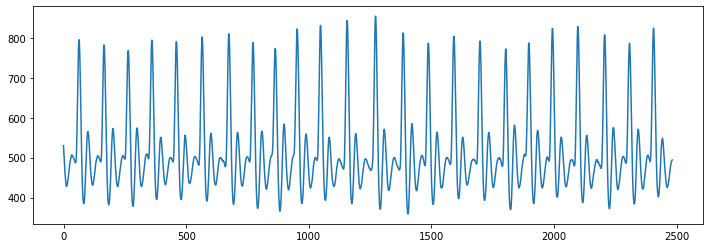

In [14]:
import heartpy as hp
import matplotlib.pyplot as plt

# load the clean PPG signal
data, timer = hp.load_exampledata(0)

# visualise
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [17]:
# run the analysis
working_data, measures = hp.process(data, sample_rate = 100.0)

In [19]:
measures

{'bpm': 58.898847631242,
 'ibi': 1018.695652173913,
 'sdnn': 65.76006108019,
 'sdsd': 34.866925292300195,
 'rmssd': 64.73723110319973,
 'pnn20': 0.8636363636363636,
 'pnn50': 0.4090909090909091,
 'hr_mad': 40.0,
 'sd1': 45.75807746062504,
 'sd2': 82.92683223259064,
 's': 11921.000815765336,
 'sd1/sd2': 0.5517885614186272,
 'breathingrate': 0.12804097311139565}